## [A/B Test Analysis] Which Group Performs Better: Control vs Test

### Business Task:
Determine whether the new feature (in the test group) leads to a statistically significant increase in user engagement compared to the control group.

### Data Source:
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/sergylog/ab-test-aggregated-data/data). The dataset contains simulated user-aggregated data from an A/B test experiment. The dataset contains the following attributes:
- *user_id*: a user unique identifier
- *group*: experiment group either *control* or *test*
- *views*: number of webpage views
- *clicks*: number of experimental feature clicks

### Data Preparation

Install *tidyverse*, *conflicted*, and *scales* libraries. *tidyverse* is a collection of R packages for data science workflows. It includes *ggplot2* for visualization, *dplyr* for data wrangling, *tidyr* for tidying data, *readr* for reading CSVs, *purrr* for functional programming, and *tibble* for modern data frames. *conflicted*, on the other hand, is a library that helps manage namespace conflicts between R packages. *scales* provides functions and formatting tools for data visualization.

In [1]:
install.packages("tidyverse")
install.packages("conflicted")
install.packages("scales")

Installing package into ‘/home/laballais/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/laballais/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/laballais/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



Load the libraries and set default choices for library conflicts.

In [2]:
library("tidyverse")
library("conflicted")
library("scales")

conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


Save the dataset (csv) into a dataframe.

In [3]:
# Dataset is assumed to be located inside a folder named "dataset" which is in the same location as this file.
data <- read.csv("./dataset/ab_test_results_aggregated_views_clicks_2.csv")

### Data Cleaning and Processing:

Inspect the dataframe.

In [5]:
colnames(data)  
nrow(data) 
dim(data)  
head(data) 
str(data)
summary(data)

[1] "user_id" "group"   "views"   "clicks"

[1] 120000

[1] 120000      4

,user_id,group,views,clicks
,<int>,<chr>,<dbl>,<dbl>
1,1,control,10,0
2,2,control,1,0
3,3,control,1,0
4,4,control,2,0
5,5,control,3,0
6,6,control,4,1


'data.frame':	120000 obs. of  4 variables:
 $ user_id: int  1 2 3 4 5 6 7 8 9 10 ...
 $ group  : chr  "control" "control" "control" "control" ...
 $ views  : num  10 1 1 2 3 4 9 5 1 3 ...
 $ clicks : num  0 0 0 0 0 1 0 0 0 0 ...


    user_id          group               views             clicks      
 Min.   :     1   Length:120000      Min.   :  1.000   Min.   :0.0000  
 1st Qu.: 30001   Class :character   1st Qu.:  2.000   1st Qu.:0.0000  
 Median : 60000   Mode  :character   Median :  3.000   Median :0.0000  
 Mean   : 60000                      Mean   :  4.991   Mean   :0.1827  
 3rd Qu.: 90000                      3rd Qu.:  6.000   3rd Qu.:0.0000  
 Max.   :120000                      Max.   :205.000   Max.   :9.0000  

Check for any missing value in the data.

In [6]:
anyNA(data)

[1] FALSE

### Data Analysis and Visualization

Check the proportion distribution between *control* and *test* group then plot the distribution.

In [10]:
group_counts <- table(data$group)
prop.table(group_counts)


control    test 
    0.5     0.5 

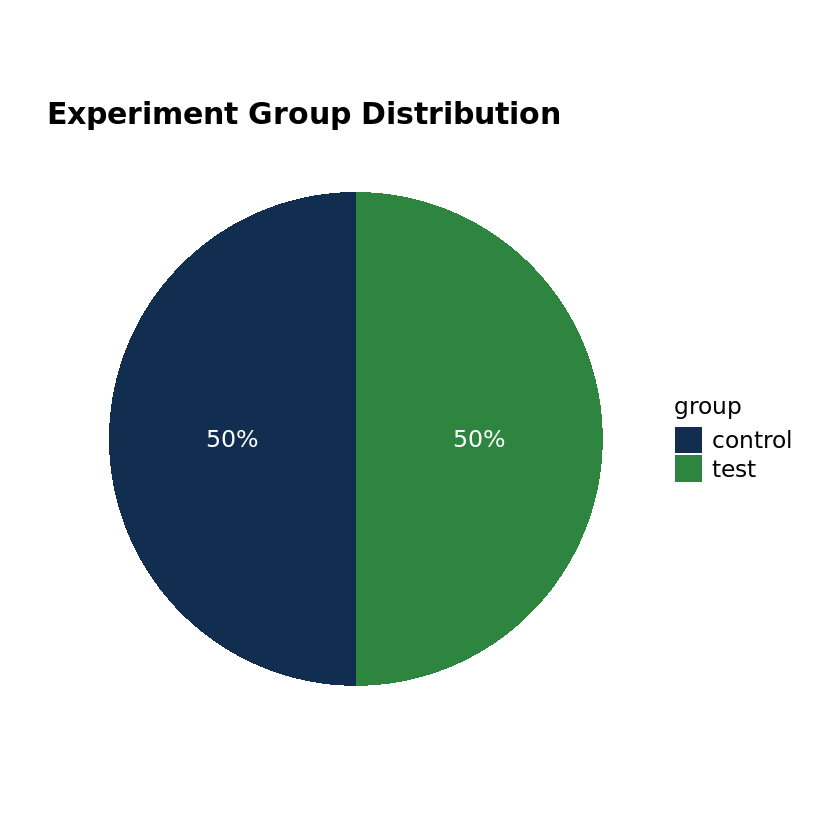

In [79]:
# Store the group counts into a dataframe and label the columns as group and count.
group_df <- as.data.frame(group_counts)
colnames(group_df) <- c("group", "count")

# Assign custom colors for control and test group. These colors will be used throughout the analysis for both groups.
custom_colors <- c("control" = "#112e51", "test" = "#2e8540")

# Plot the pie chart of distribution.
ggplot(group_df, aes(x = "", y = count, fill = group)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = custom_colors) +
  geom_text(aes(label = paste0(round(count / sum(count) * 100, 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white",
            size = 5) +
  labs(title = "Experiment Group Distribution") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0, size = 18, face = "bold"),      # Title size and style
    legend.title = element_text(size = 14),                   # Legend title size
    legend.text  = element_text(size = 14),                   # Legend item labels
    plot.margin = unit(c(0, 1, 0, 1), "cm")                   # Padding around chart: top, right, bottom, left
  )

The two experiment groups are equally distributed in the dataset which means there is no sampling bias. Both groups are well represented in the experiment.

Let's plot how often users view vs click using a scatter plot with trendlines.

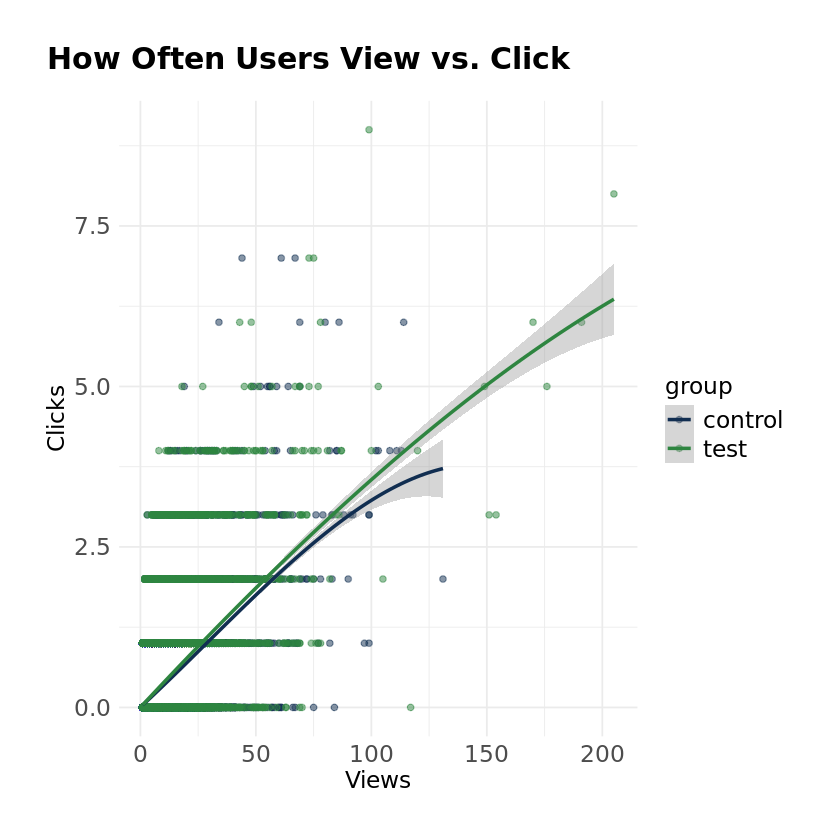

In [118]:
# Scatter plot of views vs clicks
ggplot(data, aes(x = views, y = clicks, color = group)) +
  geom_point(alpha = 0.5) +
  # geom_smooth(method = "gam", formula = y ~ s(x), se = TRUE, size = 1.2) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 3), se = TRUE) +
  scale_color_manual(values = custom_colors) +
  labs(title = "How Often Users View vs. Click",
        x = "Views",
        y = "Clicks") +
  theme_minimal() +
  theme(
    plot.title.position = "plot",
    plot.title = element_text(hjust = 0, size = 18, face = "bold", margin = margin(b = 15)),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 14),                   
    legend.text  = element_text(size = 14),                   
    plot.margin = unit(c(1, 1, 1, 1), "cm") 
  )

The trendlines above show that the number of clicks generally increase with views. The trendlines aren't exactly linear and suggests engagement plateaus after some number of views.

The *test* group trendline consistently sits above the *control* group, indicating the *test* group has stronger engagement.

The typical user behavior is in the low-view, low-click zone. It must be noted that only the *test* group has extremely high views and higher clicks. Users can be segmented into different types to gain more insight. More data is needed to be able to gain more insight on the level of engagement for different kinds of users.

Now, compute for the *conversion_rate*. In the context of this dataset, *conversion_rate* is how often users clicked after viewing a feature or webpage.

In [115]:
data$conversion_rate = data$clicks / data$views

Check the statistical significance of the conversion_rate between the two experimental groups via t-test.

In [116]:
control_group <- subset(data, group == "control")
test_group <- subset(data, group == "test")

t.test(control_group$conversion_rate, test_group$conversion_rate, alternative = "two.sided", var.equal = FALSE)


	Welch Two Sample t-test

data:  control_group$conversion_rate and test_group$conversion_rate
t = -5.8715, df = 119654, p-value = 4.33e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005326118 -0.002660180
sample estimates:
 mean of x  mean of y 
0.03465443 0.03864758 


The resulting p-value of the *conversion_rate* is much smaller than 0.05. This tells us the difference in the conversion rates between the *control* and *test* groups is statistically significant and not just due to random chance. We can also see from the t-test result that the average conversion rate is 3.47% for the *control* group and 3.86% for the *test* group.

Plot the conversion rate for the two groups.

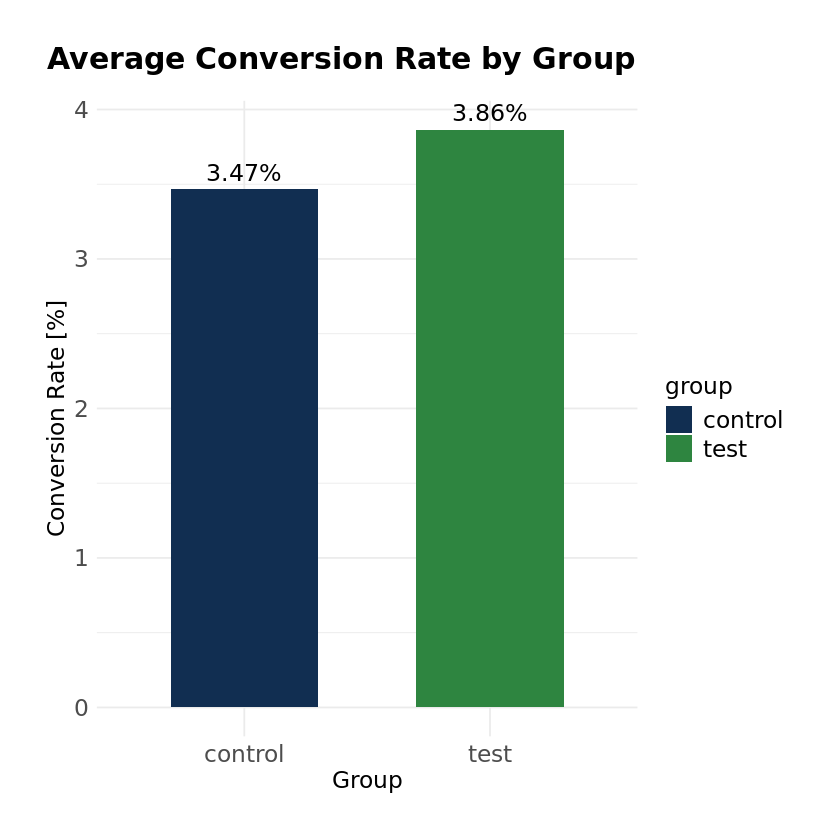

In [143]:
# Aggregate average conversion rate by group
conversion_summary <- aggregate(conversion_rate ~ group, data = data, FUN = mean)

# Plot bar chart
ggplot(conversion_summary, aes(x = group, y = conversion_rate*100, fill = group)) +
  geom_bar(stat = "identity", width = 0.6) +
  scale_fill_manual(values = custom_colors) +
  geom_text(aes(label = paste0(round(conversion_rate * 100, 2), "%")),
            vjust = -0.5,
            color = "black",
            size = 5) +
  labs(title = "Average Conversion Rate by Group",
        x = "Group",
        y = "Conversion Rate [%]") +
  theme_minimal() +
  theme(
    plot.title.position = "plot",
    plot.title = element_text(hjust = 0, size = 18, face = "bold", margin = margin(b = 15)),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 14),                   
    legend.text  = element_text(size = 14),                   
    plot.margin = unit(c(1, 1, 1, 1), "cm") 
  )

Compute the uplift. Uplift is measure of improvement caused by an intervention, which for this experiment is the test variant of the experiment.

In [146]:
mean_control <- mean(control_group$conversion_rate, na.rm = TRUE)
mean_test <- mean(test_group$conversion_rate, na.rm = TRUE)

uplift <- mean_test - mean_control
relative_uplift <- (uplift / mean_control) * 100

print(paste("Absolute uplift:", round(uplift * 100, 2), "% points increase in mean conversion rate"))
print(paste("Relative uplift:", round(relative_uplift, 2), "% increase from control"))

[1] "Absolute uplift: 0.4 % points increase in mean conversion rate"
[1] "Relative uplift: 11.52 % increase from control"


### Conclusion

The A/B test reveals a statistically significant uplift in conversion rates, with the **test group outperforming the control group** by approximately 0.4 percentage points (3.86% vs. 3.47%, p < 0.001). Visual analysis also shows a trend of **higher engagement in the test group**.